<div style="text-align: center;">
<h1> Trabajo Práctico </font></h1>
<h2> Aprendizaje de Maquina (CEIA) </font></h2>
<h3>Abril Noguera - José Roberto Castro</font></h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import requests
from io import BytesIO
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

In [2]:
# Configurar los gráficos de Seaborn
sns.set(style="whitegrid")
color = '#FF385C'
color2 = '#ff5a5f'
color3 = "#b5f6a8"
color4 = '#6a6a6a'


## Caso de Negocio: Optimización de la Ocupación y Estrategias de Precios en Airbnb

### Problema de Negocio
Los anfitriones de Airbnb en diversas metrópolis globales como Buenos Aires, Londres, París, Roma y Nueva York buscan continuamente optimizar la ocupación de sus propiedades para maximizar ingresos y mejorar la satisfacción del cliente. El desafío consiste en adaptar las estrategias de precios y mejorar las características de las propiedades de manera que respondan a las dinámicas del mercado y las preferencias cambiantes de los huéspedes en diferentes culturas y condiciones económicas.

### Objetivo
Desarrollar un modelo predictivo de machine learning que permita a los anfitriones de Airbnb en estas ciudades predecir si tendran alta o baja opcipación en sus propiedades basándose en datos históricos y tendencias de mercado. El objetivo final es utilizar estos insights para recomendar estrategias de precios que maximicen la ocupación y, consecuentemente, los ingresos.

### Datos Disponibles
El dataset contiene información detallada sobre las propiedades listadas en estas cinco ciudades, totalizando XXXX registros. Los datos incluyen ubicación, detalles del anfitrión, tipo de propiedad, capacidad, precios, mínimos y máximos de noches, disponibilidad, número de reseñas y puntuaciones en diferentes aspectos, entre otros.

Los datos representan una oportunidad para analizar tendencias de mercado, patrones de ocupación, preferencias de los clientes y otros factores que influyen en la ocupación y rentabilidad de las propiedades.

### Variable Target
La variable target para el modelo predictivo será la **ocupación** (derivada de las columnas de disponibilidad). Esta variable sera 1 en caso de que la ocupación sea alta, mayor al 80% de la tasa de ocupación, y 0 en caso contrario. Se buscará predecirla basándose en características del listado y otros indicadores de desempeño histórico.

### Población Objetivo
La población objetivo incluye todos los listados de propiedades en Airbnb de estas ciudades, recopilados a través de un scrapping realizado en marzo de 2024. Este dataset integral representa todas las propiedades disponibles para alquiler en ese momento, proporcionando una base exhaustiva sobre la cual entrenar el modelo.

### Periodos Considerados en el Dataset
El dataset incluye datos recopilados en un scrapping específico realizado en XXXX, capturando así todas las propiedades activas en Airbnb en ese período.

### Estrategias y Soluciones Propuestas
Desarrollar un modelo de machine learning que pueda predecir la ocupación de las propiedades basándose en factores como la ubicación, tipo de propiedad, temporada del año y calificaciones de reseñas. Basándose en las predicciones de ocupación, el modelo también sugerirá ajustes de precios y otras estrategias de optimización para ayudar a los anfitriones a tomar decisiones basadas en datos que maximicen la ocupación y rentabilidad en un contexto global diverso.


## Análisis y Limpieza de Datos
### Carga de Datos
Cargar el dataset, configurando la lectura para manejar encabezados y tipos de datos automáticamente.

In [3]:
def load_and_get_df(url: str, alias: str) -> pd.DataFrame:
    '''
    Descarga un archivo CSV.GZ desde una URL, lo lee como pandas DataFrame y agrega la columna "city".
    '''
    print(f"Descargando datos de {alias}...")

    # Descargar archivo desde la URL en memoria
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"No se pudo descargar el archivo de {alias}")

    # Leer el contenido comprimido en memoria
    df = pd.read_csv(BytesIO(response.content), compression='gzip')

    # Agregar columna de ciudad
    df["city"] = alias

    print(f"Registros en {alias}: {len(df)}")
    return df

In [4]:
# URLs de los datasets
urls = {
    "Buenos Aires": "https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2025-01-29/data/listings.csv.gz",
    # "London": "https://data.insideairbnb.com/united-kingdom/england/london/2024-03-19/data/listings.csv.gz",
    # "Paris": "https://data.insideairbnb.com/france/ile-de-france/paris/2024-03-16/data/listings.csv.gz",
    # "Rome": "https://data.insideairbnb.com/italy/lazio/rome/2024-03-22/data/listings.csv.gz",
    # "New York": "https://data.insideairbnb.com/united-states/ny/new-york-city/2024-05-03/data/listings.csv.gz"
}

# Cargar y unir todos los dataframes
dfs = [load_and_get_df(url, city) for city, url in urls.items()]
df = pd.concat(dfs, ignore_index=True)

print(f"Total de registros combinados: {len(df)}")

Descargando datos de Buenos Aires...
Registros en Buenos Aires: 35172
Total de registros combinados: 35172


### Visualización de la Estructura de Datos
Revisar el esquema del DataFrame para comprender la estructura y los tipos de datos disponibles.

In [5]:
# Muestra de la base
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,11508,https://www.airbnb.com/rooms/11508,20250129142212,2025-01-30,city scrape,Amazing Luxurious Apt-Palermo Soho,LUXURIOUS 1 BDRM APT- POOL/ GYM/ 24-HR SECURIT...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,...,4.93,4.86,NaN,f,1,1,0,0,0.29,Buenos Aires
1,14222,https://www.airbnb.com/rooms/14222,20250129142212,2025-01-30,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,...,4.87,4.75,NaN,f,6,6,0,0,0.80,Buenos Aires
2,15074,https://www.airbnb.com/rooms/15074,20250129142212,2025-01-30,previous scrape,ROOM WITH RIVER SIGHT,NaN,NaN,https://a0.muscache.com/pictures/91166/c0fdcb4...,59338,...,NaN,NaN,NaN,f,1,0,1,0,NaN,Buenos Aires
3,16695,https://www.airbnb.com/rooms/16695,20250129142212,2025-01-30,city scrape,DUPLEX LOFT 2 - SAN TELMO,NaN,San Telmo is one of the best neighborhoods in ...,https://a0.muscache.com/pictures/619c33a9-0618...,64880,...,4.39,4.41,NaN,t,9,9,0,0,0.27,Buenos Aires
4,20062,https://www.airbnb.com/rooms/20062,20250129142212,2025-01-30,city scrape,PENTHOUSE /Terrace & pool /City views /2bedrooms,NaN,NaN,https://a0.muscache.com/pictures/165679/2eb448...,75891,...,4.93,4.79,NaN,f,4,4,0,0,1.84,Buenos Aires


In [6]:
# Convertir host_response_rate y host_acceptance_rate de porcentaje a número
df["host_response_rate"] = df["host_response_rate"].str.replace("%", "").astype(float) / 100
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%", "").astype(float) / 100

# Convertir precio de string con $ y , a float
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/var/folders/w_/wxbpcvrx4j32nhvgtndjj5r1jblnfs/T/ipykernel_95836/693441673.py:6: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)


In [7]:
# Muestra de la estructura de la base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 80 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            35172 non-null  int64  
 1   listing_url                                   35172 non-null  object 
 2   scrape_id                                     35172 non-null  int64  
 3   last_scraped                                  35172 non-null  object 
 4   source                                        35172 non-null  object 
 5   name                                          35172 non-null  object 
 6   description                                   34299 non-null  object 
 7   neighborhood_overview                         16588 non-null  object 
 8   picture_url                                   35171 non-null  object 
 9   host_id                                       35172 non-null 

### Análisis Preliminar de Datos
- **Visualización del Total de Registros y Columnas**: Evaluar la cantidad de datos disponibles.
 - **Análisis Descriptivo de Datos Numéricos**: Descripción de valores numéricos

In [8]:
# Columnas categóricas (tipo object o string)
categoric_cols = df.select_dtypes(include=["object", "string"]).columns.tolist()
print("Las columnas de tipo categóricas son: ", categoric_cols, '\n')

# Columnas numéricas (int o float)
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
print("Las columnas de tipo numéricas son: ", numeric_cols)

Las columnas de tipo categóricas son:  ['listing_url', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable', 'city'] 

Las columnas de tipo numéricas son:  ['id', 'scrape_id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_

In [9]:
# Descripción de variables numéricas
df[numeric_cols].describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.517200e+04,3.517200e+04,3.517200e+04,30943.000000,31460.000000,35166.000000,35166.000000,0.0,35172.000000,35172.000000,...,29412.000000,29412.000000,29412.000000,29412.000000,29411.000000,35172.000000,35172.000000,35172.000000,35172.000000,29412.000000
mean,7.117880e+17,2.025013e+13,2.143294e+08,0.933422,0.851008,19.539641,29.425553,NaN,-34.591554,-58.417289,...,4.741915,4.865169,4.859413,4.870813,4.748523,15.646878,15.048277,0.526242,0.041766,1.325920
std,4.840974e+17,3.906306e-03,2.027420e+08,0.201241,0.264485,41.289336,79.583662,NaN,0.018257,0.030169,...,0.382239,0.307035,0.321622,0.263315,0.374513,34.108688,34.083499,2.653005,0.644463,1.336446
min,1.150800e+04,2.025013e+13,1.342600e+04,0.000000,0.000000,1.000000,1.000000,NaN,-34.693700,-58.530890,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.719776e+07,2.025013e+13,3.070016e+07,1.000000,0.850000,1.000000,1.000000,NaN,-34.602670,-58.437050,...,4.670000,4.850000,4.840000,4.840000,4.680000,1.000000,1.000000,0.000000,0.000000,0.360000
50%,8.875662e+17,2.025013e+13,1.421004e+08,1.000000,0.980000,3.000000,4.000000,NaN,-34.590890,-58.418914,...,4.840000,4.950000,4.960000,4.940000,4.840000,2.000000,2.000000,0.000000,0.000000,0.930000
75%,1.095206e+18,2.025013e+13,4.298024e+08,1.000000,1.000000,16.000000,20.000000,NaN,-34.581047,-58.392114,...,4.980000,5.000000,5.000000,5.000000,4.960000,12.000000,11.000000,0.000000,0.000000,1.910000
max,1.344330e+18,2.025013e+13,6.754917e+08,1.000000,1.000000,670.000000,2542.000000,NaN,-34.534980,-58.355403,...,5.000000,5.000000,5.000000,5.000000,5.000000,222.000000,222.000000,43.000000,14.000000,26.080000


### Análisis de Valores Faltantes
- **Identificar Columnas con Valores Faltantes**: Determinar qué columnas contienen valores faltantes y en qué proporción.
- **Evaluar el Impacto**: Considerar cómo la falta de datos puede impactar los análisis posteriores y las decisiones basadas en datos.
- **Estrategias de Manejo**: Definir cómo se manejarán los valores faltantes, ya sea mediante imputación, eliminación o  otro método adecuado.


In [10]:
# Reemplazar '.' o '-' por NaN si son los únicos caracteres en la celda
for column_name in categoric_cols:
    df[column_name] = df[column_name].replace(r'^[\.\-]$', np.nan, regex=True)

# Reemplazar "N/A" por NaN en todas las columnas
df.replace("N/A", np.nan, inplace=True)

In [11]:
# Muestra de nulos por columna
null_counts = df.isna().sum().sort_values(ascending=False)[:15]
print(null_counts)

neighbourhood_group_cleansed    35172
calendar_updated                35172
license                         34783
neighborhood_overview           18587
neighbourhood                   18584
host_about                      16360
host_neighbourhood              13451
host_location                    7553
review_scores_value              5761
review_scores_accuracy           5761
review_scores_communication      5760
review_scores_checkin            5760
last_review                      5760
review_scores_rating             5760
first_review                     5760
dtype: int64


In [12]:
def eliminar_columnas_con_muchos_nulos(df, umbral=0.9):
    """
    Elimina columnas con más del `umbral` porcentaje de valores nulos.
    
    - df: DataFrame de pandas
    - umbral: proporción de nulos permitidos (por defecto 0.9 = 90%)
    - return: DataFrame sin las columnas eliminadas
    """
    porcentaje_nulos = df.isna().mean()
    columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > umbral].index.tolist()
    
    print(f"Columnas eliminadas ({len(columnas_a_eliminar)}): {columnas_a_eliminar}")
    
    return df.drop(columns=columnas_a_eliminar)

# Eliminar columnas con más del 90% de nulos
df = eliminar_columnas_con_muchos_nulos(df, umbral=0.9)

Columnas eliminadas (3): ['neighbourhood_group_cleansed', 'calendar_updated', 'license']


In [13]:
# Se mantienen como vacios las descripciones, dado que puede ser un indicador importante en la performance del alquiler.
df[["description", "neighborhood_overview", "host_about"]] = df[["description", "neighborhood_overview", "host_about"]].fillna("")

In [14]:
print(df[['neighbourhood', 'neighbourhood_cleansed']].head())
print('\n')
print(df[['neighbourhood', 'neighbourhood_cleansed']].info())

# La columna neighbourhood no es muy representativa al tratarse de información de CABA, por lo que se mantiene unicamente neighbourhood_cleansed.
df.drop(columns=["neighbourhood"], inplace=True)

                                       neighbourhood neighbourhood_cleansed
0           Buenos Aires, Capital Federal, Argentina                Palermo
1  Palermo/Buenos Aires, Autonomous City of Bueno...                Palermo
2                                                NaN                  Nuñez
3           Buenos Aires, Capital Federal, Argentina              Monserrat
4                                                NaN                Palermo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   neighbourhood           16588 non-null  object
 1   neighbourhood_cleansed  35172 non-null  object
dtypes: object(2)
memory usage: 549.7+ KB
None


In [15]:
# Extraer número de bathrooms desde bathrooms_text (si falta bathrooms)
df["extracted_bathrooms"] = df["bathrooms_text"].str.extract(r"(\d+)").astype(float)
df["bathrooms"] = df["bathrooms"].fillna(df["extracted_bathrooms"])
df.drop(columns=["extracted_bathrooms"], inplace=True)

In [16]:
# Imputar 'first_review' y 'last_review' con 'host_since' si están vacíos
df["first_review"] = df["first_review"].fillna(df["host_since"])
df["last_review"] = df["last_review"].fillna(df["host_since"])

In [17]:
# Imputar columnas con mediana
cols_mediana = ['bathrooms', 'bedrooms', 'beds']
for col_name in cols_mediana:
    mediana = df[col_name].median()
    df[col_name] = df[col_name].fillna(mediana)

In [18]:
# Imputar columnas con media
cols_media = [
    'host_response_rate', 'host_acceptance_rate', 'review_scores_rating', 
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
    'review_scores_communication', 'review_scores_location', 'review_scores_value', 
    'reviews_per_month'
]

for col_name in cols_media:
    media = df[col_name].mean()
    df[col_name] = df[col_name].fillna(media)

In [19]:
# Imputar columnas con moda
cols_moda = ["host_location", "host_neighbourhood", "host_response_time", "host_is_superhost", "bathrooms_text"]
for col_name in cols_moda:
    moda = df[col_name].mode().iloc[0]
    df[col_name] = df[col_name].fillna(moda)

In [20]:
# Definir columna has_availability si todas las availability son 0 y está vacía
cond = (
    (df['availability_30'] == 0) &
    (df['availability_60'] == 0) &
    (df['availability_90'] == 0) &
    (df['availability_365'] == 0) &
    (df['has_availability'].isna())
)
df.loc[cond, 'has_availability'] = 'f'
df["has_availability"] = df["has_availability"].fillna("t")

In [21]:
def eliminar_filas_con_nulos(df, columnas):
    """
    Elimina filas del DataFrame si alguna de las columnas especificadas tiene un valor nulo.
    
    - df: DataFrame de pandas
    - columnas: lista de nombres de columnas a verificar
    - return: DataFrame sin esas filas
    """
    df_filtrado = df.dropna(subset=columnas)
    print(f"Filas eliminadas: {len(df) - len(df_filtrado)}")
    return df_filtrado

df = eliminar_filas_con_nulos(df, ["price", "host_name", "picture_url"])

Filas eliminadas: 3581


In [22]:
# Muestra de nulos por columna
null_counts = df.isna().sum().sort_values(ascending=False)[:10]
print(null_counts)

id                        0
availability_30           0
number_of_reviews_l30d    0
number_of_reviews_ltm     0
number_of_reviews         0
calendar_last_scraped     0
availability_365          0
availability_90           0
availability_60           0
has_availability          0
dtype: int64


In [23]:

print(f"El total de registros luego de la limpieza de nulos es: {df.shape[0]}")

El total de registros luego de la limpieza de nulos es: 31591


###  Limpieza de Datos de Texto
- **Eliminar Etiquetas HTML:** Antes de proceder con el análisis exploratorio más detallado, se deben limpiar las variables de texto que pueden contener etiquetas de HTML, lo cual puede distorsionar las interpretaciones de los datos.
- **Convertir Columnas a Dummies:** Procesar los datos de `host_verifications` para convertir esta columna de listas de verificaciones en múltiples columnas binarias (dummies), cada una representando una verificación posible.

In [24]:
def remove_html_tags(df):
    '''
    Elimina etiquetas HTML, caracteres no ASCII y normaliza espacios en columnas de texto.
    - Input: df de pandas
    - Output: df limpio
    '''
    for column_name in df.select_dtypes(include=["object", "string"]).columns:
        df[column_name] = (
            df[column_name]
            .astype(str)
            .str.replace(r'<.*?>', ' ', regex=True)           # eliminar etiquetas HTML
            .str.replace(r'[^\x00-\x7F]+', ' ', regex=True)   # eliminar caracteres no ASCII
            .str.replace(r'\s+', ' ', regex=True)             # normalizar espacios
            .str.strip()                                      # quitar espacios en extremos
        )
    return df

# Eliminación de etiquetas de HTML
df = remove_html_tags(df)

In [25]:
# Limpiar y convertir la columna en listas
df["host_verifications"] = (
    df["host_verifications"]
    .astype(str)
    .str.replace(r"[\[\]'\"]", "", regex=True)  # eliminar comillas y corchetes
    .str.strip()
    .str.split(",")                             # convertir a lista
    .apply(lambda lst: [item.strip() for item in lst if item])
)

# Obtener todos los tipos únicos
unique_types = set()
df["host_verifications"].dropna().apply(unique_types.update)
unique_types = sorted(filter(None, unique_types))  # eliminar strings vacíos
print(f"Los valores únicos de host_verifications son: {unique_types}")

# Crear columnas dummy (una por cada tipo de verificación)
for item in unique_types:
    col_name = "verif_" + item.replace(" ", "_")
    df[col_name] = df["host_verifications"].apply(lambda x: int(item in x) if isinstance(x, list) else 0)

# # Eliminar la columna original
df.drop(columns=["host_verifications"], inplace=True)

Los valores únicos de host_verifications son: ['email', 'phone', 'photographer', 'work_email']


In [26]:
# Eliminar caracteres no alfabéticos ni comas/espacios
df["amenities"] = df["amenities"].astype(str).str.replace(r"[^a-zA-Z ,]", "", regex=True)

# Reemplazar múltiples espacios por uno solo
df["amenities"] = df["amenities"].str.replace(r"\s+", " ", regex=True).str.strip()

# Separar por coma + espacio → lista limpia de strings
df["amenities"] = df["amenities"].str.split(", ").apply(lambda lst: [item.strip() for item in lst if item])

La variable `price` en el dataset de Airbnb está expresada en la moneda local de cada ciudad. Esto presenta un desafío para el análisis agregado y comparativo entre ciudades que están en diferentes regiones geográficas y económicas.

Se convertiran todos los precios a una moneda común, específicamente el dólar estadounidense (USD), utilizando los tipos de cambio vigentes en las fechas de scrapping. Esta estandarización permitirá realizar comparaciones directas y más precisas entre las propiedades en diferentes ciudades.

In [27]:
# Tasas de cambio aproximadas en la fecha de scrapping
tasas_cambio = {
    "Buenos Aires": 1155,  # ARS a USD 2025-01-29
    # "London": 0.79,       # GBP a USD 2024-03-19
    # "Paris": 0.92,         # EUR a USD 2024-03-16
    # "Rome": 0.92,          # EUR a USD 2024-03-22
    # "New York": 1         # USD a USD (base)
}

# Función para convertir precio a USD
def convert_currency(price, city):
    rate = tasas_cambio.get(city, 1)
    return price / rate

# Aplicar la conversión a toda la columna
df["price"] = df.apply(lambda row: convert_currency(row["price"], row["city"]), axis=1)

Se convierten las variables categóricas `host_is_superhost`, `host_has_profile_pic`, `host_identity_verified` y `instant_bookable` de 't' (True) y 'f' (False) a valores booleanos. 

In [28]:
# Conversión de 't'/'f' a 1/0
cols_binarias = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "instant_bookable"]

for col in cols_binarias:
    df[col] = df[col].map({'t': 1, 'f': 0})

### Definición de Variable Target para el Modelo Predictivo
El objetivo del modelo predictivo será estimar la tasa de ocupación de las propiedades, la cual se definirá como el complemento del porcentaje de días disponibles en un período futuro determinado. Esta métrica permite modelar directamente la demanda o popularidad de una propiedad y es crucial para la toma de decisiones operativas y estratégicas.

Para calcular la tasa de ocupación, utilizaremos las siguientes columnas de disponibilidad:
- `has_availability`: Indica si la propiedad está disponible para ser reservada (t para sí, f para no).
- `availability_30`: Disponibilidad de la propiedad en los próximos 30 días.
- `availability_60`: Disponibilidad de la propiedad en los próximos 60 días.
- `availability_90`: Disponibilidad de la propiedad en los próximos 90 días.
- `availability_365`: Disponibilidad de la propiedad en los próximos 365 días.

El modelo se enfocará en un horizonte de predicción a mediano plazo (60 días). Esta decisión se basa en:
- **Equilibrio entre precisión y utilidad operativa:** Un horizonte de 60 días proporciona una predicción suficientemente anticipada para permitir ajustes operativos, sin sacrificar significativamente la precisión debido a la incertidumbre de pronosticar a más largo plazo.
- **Optimización de estrategias de precios y promociones:** El período seleccionado permite implementar o ajustar estrategias de precios y promociones con suficiente anticipación, lo cual es esencial para optimizar la ocupación y los ingresos.
- **Adaptación a patrones estacionales:** Permite adaptarse a cambios estacionales que pueden afectar significativamente la demanda de alojamiento.


In [29]:
# Calcular la tasa de ocupación en los próximos 60 días
df["occupation_rate"] = 1 - (df["availability_60"] / 60)

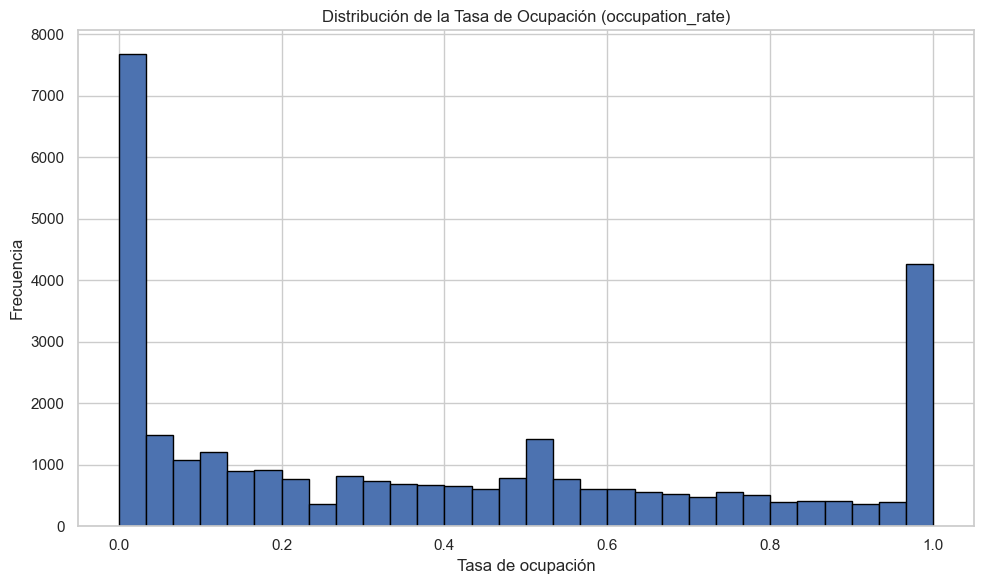

In [30]:
plt.figure(figsize=(10, 6))
df["occupation_rate"].hist(bins=30, edgecolor='black')
plt.title("Distribución de la Tasa de Ocupación (occupation_rate)")
plt.xlabel("Tasa de ocupación")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
df["occupated"] = (df["occupation_rate"] >= 0.8).astype(int)

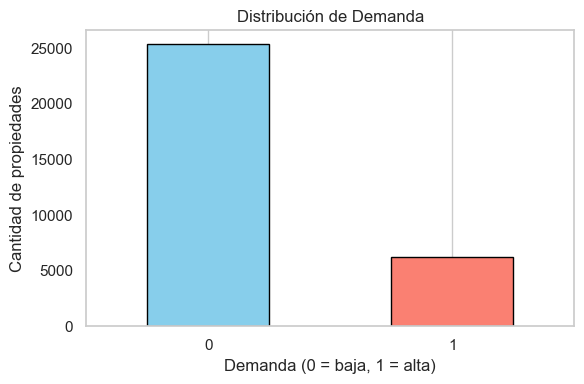

In [32]:
# Contar ocurrencias de cada clase
counts = df["occupated"].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
counts.plot(kind="bar", color=["skyblue", "salmon"], edgecolor="black")
plt.title("Distribución de Demanda")
plt.xlabel("Demanda (0 = baja, 1 = alta)")
plt.ylabel("Cantidad de propiedades")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Análisis Exploratorio de Datos
### Objetivos del Análisis
- **Identificar patrones**: Comprender los patrones de ocupación, precios, y preferencias de los usuarios.
- **Segmentación de propiedades**: Clasificar las propiedades en diferentes grupos basados en características como ubicación, tipo, y capacidad.
- **Optimización de recursos**: Identificar áreas de mejora en la gestión de las propiedades para optimizar la rentabilidad.


#### 1. Comprender el Dataset
**Preguntas a responder:**
- ¿Cuáles son las principales características de las propiedades listadas en Airbnb en las cinco ciudades seleccionadas?
- ¿Cómo están distribuidas las propiedades en términos de ubicación, tipo de propiedad, capacidad y precio?

**Análisis:**
- Resumen estadístico de las variables principales.
- Distribución de propiedades por ciudad.
- Tipos de propiedades más comunes en cada ciudad.
- Distribución de capacidad y precios por ciudad.

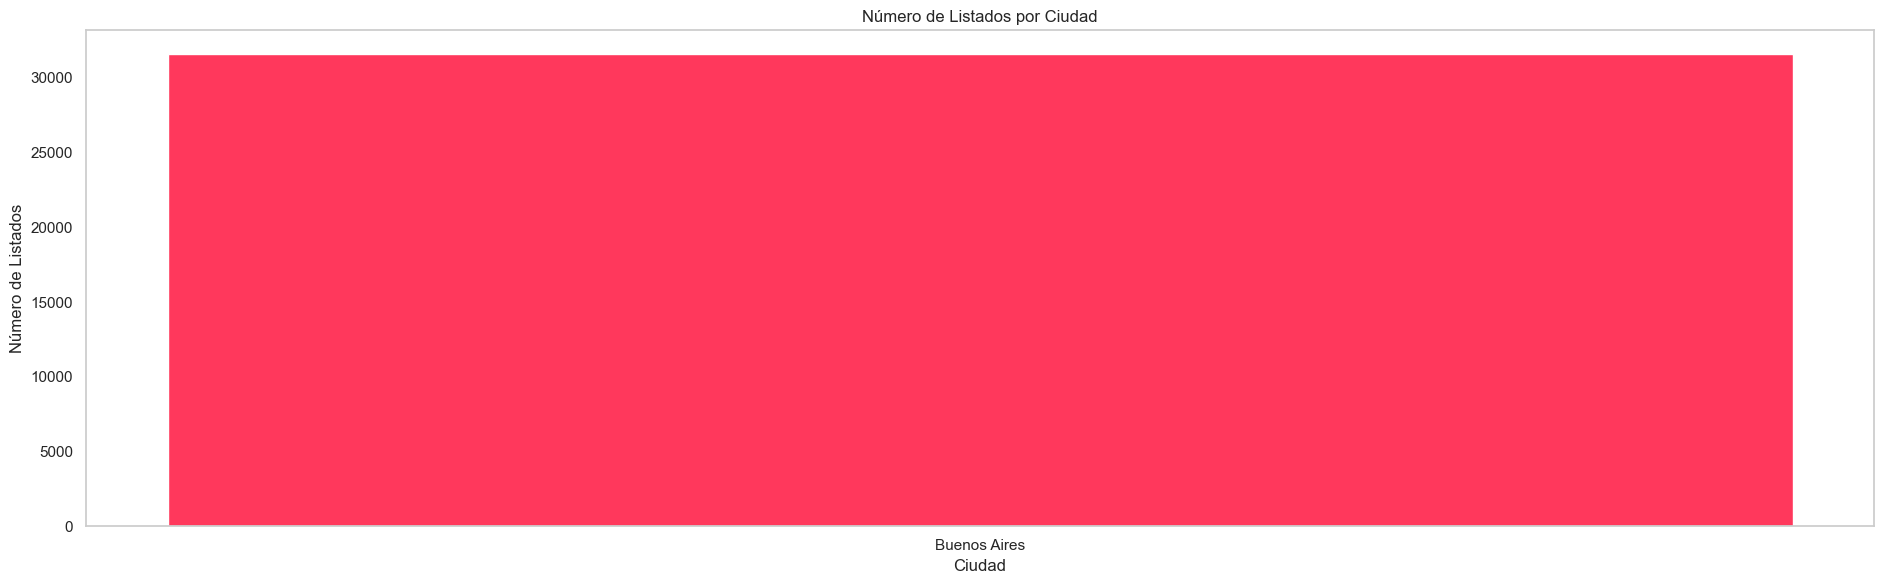

In [33]:
# Agrupar por ciudad y contar
city_counts = df["city"].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(19, 6))
plt.bar(city_counts.index, city_counts.values, color=color)
plt.xlabel('Ciudad')
plt.ylabel('Número de Listados')
plt.title('Número de Listados por Ciudad')
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

**Interpretación:**

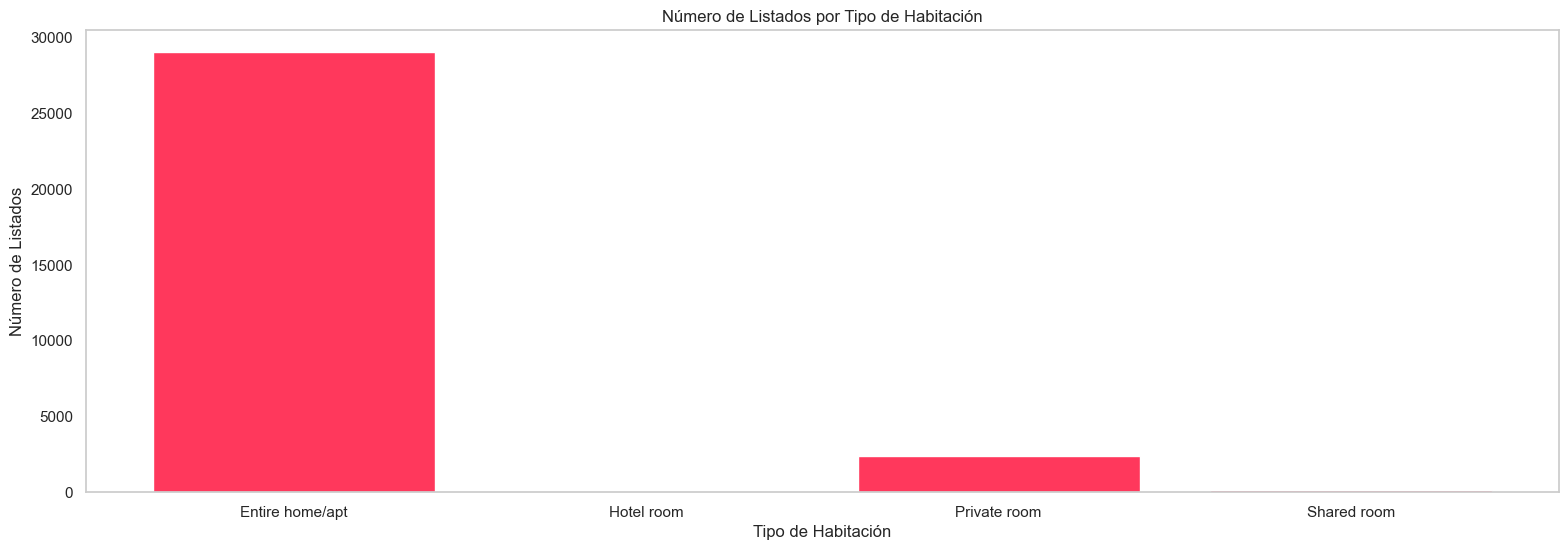

In [34]:
# Agrupar por tipo de habitación y contar el número de propiedades
room_type_counts = df["room_type"].value_counts().sort_index()
# Crear gráfico de barras
plt.figure(figsize=(19, 6))
plt.bar(room_type_counts.index, room_type_counts.values, color=color)
plt.xlabel('Tipo de Habitación')
plt.ylabel('Número de Listados')
plt.title('Número de Listados por Tipo de Habitación')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

**Interpretación:**

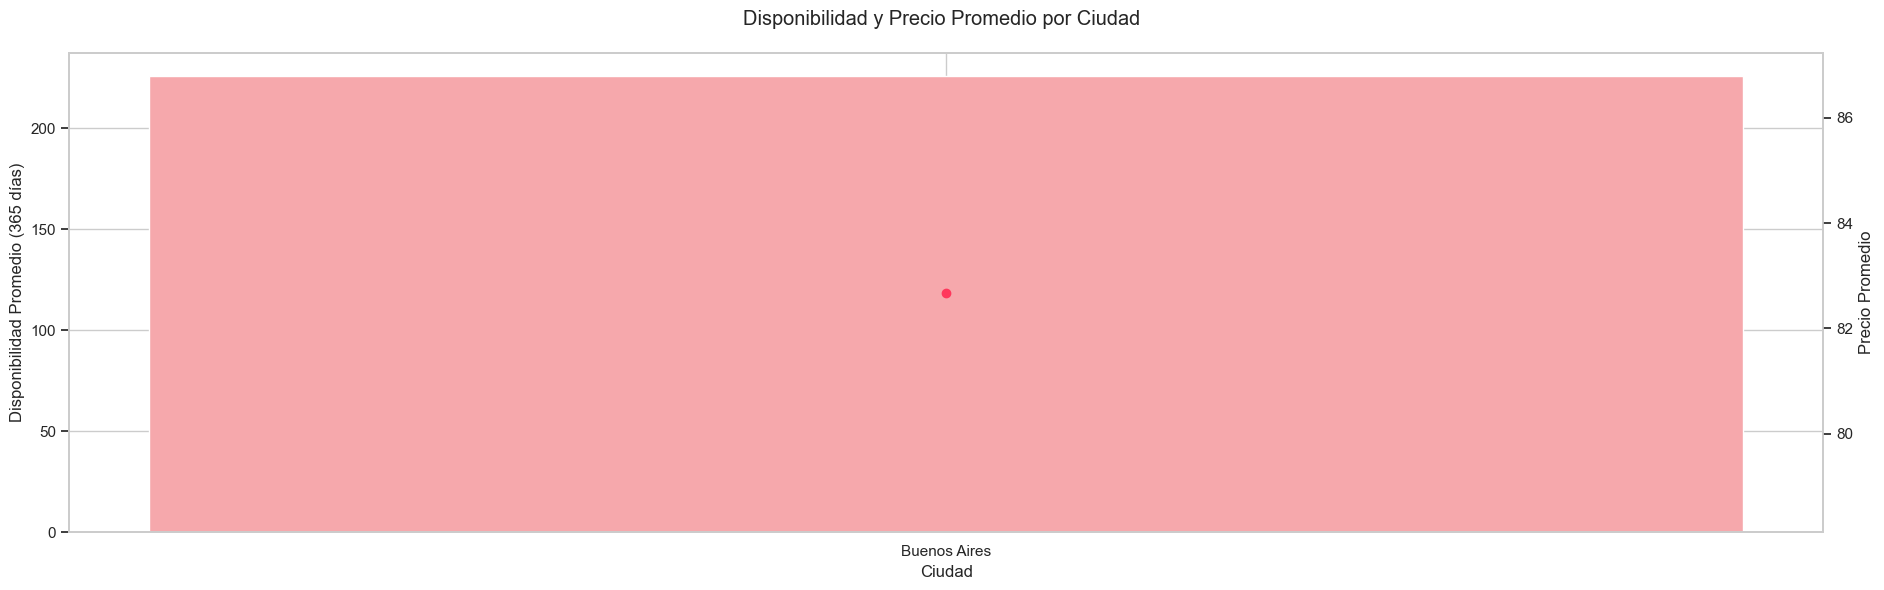

In [35]:
# Agrupar y calcular medias
availability_desc = df.groupby('city')['availability_365'].mean().reset_index()
price_desc = df.groupby('city')['price'].mean().reset_index()

# Combinar ambos resultados
combined_df = pd.merge(availability_desc, price_desc, on='city')
combined_df.columns = ['city', 'avg_availability_365', 'avg_price']

# Crear gráfico con dos ejes Y
fig, ax1 = plt.subplots(figsize=(19, 6))

# Eje Y izquierdo: Disponibilidad
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Disponibilidad Promedio (365 días)')
ax1.bar(combined_df['city'], combined_df['avg_availability_365'], color='#f6a8ac', label='Disponibilidad Promedio')
ax1.tick_params(axis='y')
ax1.set_xticks(range(len(combined_df['city'])))
ax1.set_xticklabels(combined_df['city'], rotation=0)

# Eje Y derecho: Precio
ax2 = ax1.twinx()
ax2.set_ylabel('Precio Promedio')
ax2.plot(combined_df['city'], combined_df['avg_price'], color='#FF385C', marker='o', label='Precio Promedio')
ax2.tick_params(axis='y')

# Título
fig.suptitle('Disponibilidad y Precio Promedio por Ciudad')

# Ajustar y mostrar
fig.tight_layout()
plt.grid(False)
plt.show()

**Interpretación:**

#### 2. Identificación de Outliers
Para visualizar los outliers en la variable `price`, utilizamos un boxplot. Este gráfico nos permite identificar visualmente los valores atípicos que se encuentran fuera del rango esperado.


/var/folders/w_/wxbpcvrx4j32nhvgtndjj5r1jblnfs/T/ipykernel_95836/1395783763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, y="city", x="price", palette="Set1")


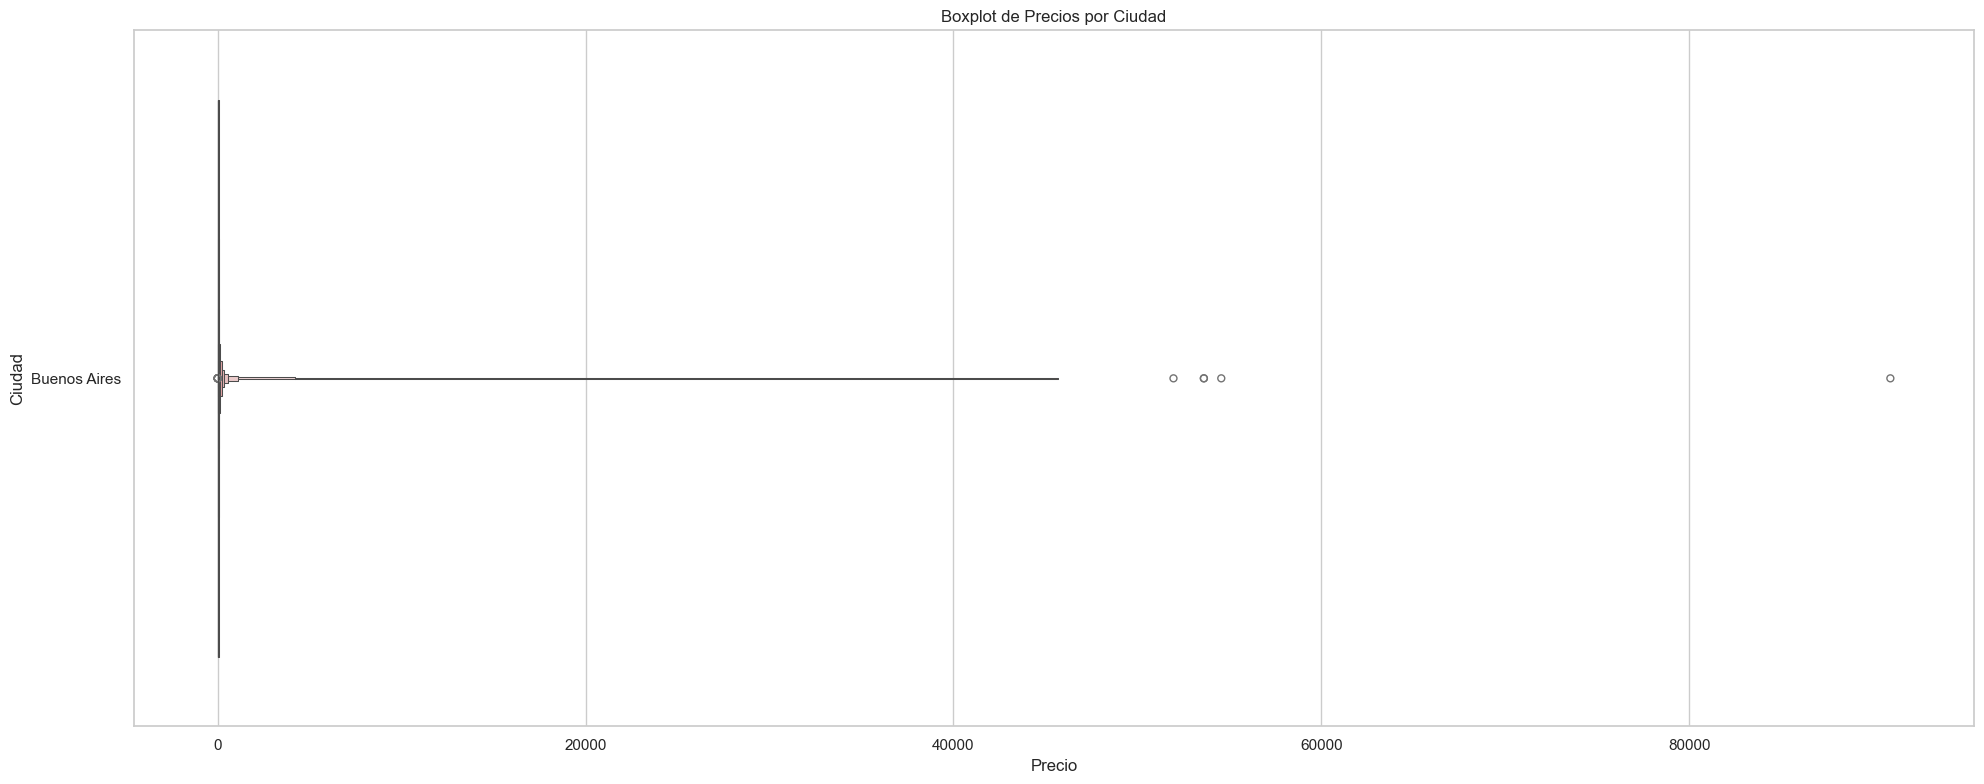

In [36]:
# Crear boxplot directamente desde df de pandas
plt.figure(figsize=(20, 8))
sns.boxenplot(data=df, y="city", x="price", palette="Set1")
plt.title('Boxplot de Precios por Ciudad')
plt.xlabel('Precio')
plt.ylabel('Ciudad')
plt.tight_layout()
plt.show()

El boxplot de precios por ciudad muestra que hay una cantidad significativa de outliers en la variable `price` para cada una de las ciudades analizadas. Estos outliers se extienden mucho más allá del rango intercuartílico, indicando valores de precios extremadamente altos en comparación con el rango típico de precios.

/var/folders/w_/wxbpcvrx4j32nhvgtndjj5r1jblnfs/T/ipykernel_95836/390712186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, y="city", x="log_price", palette="Set2")


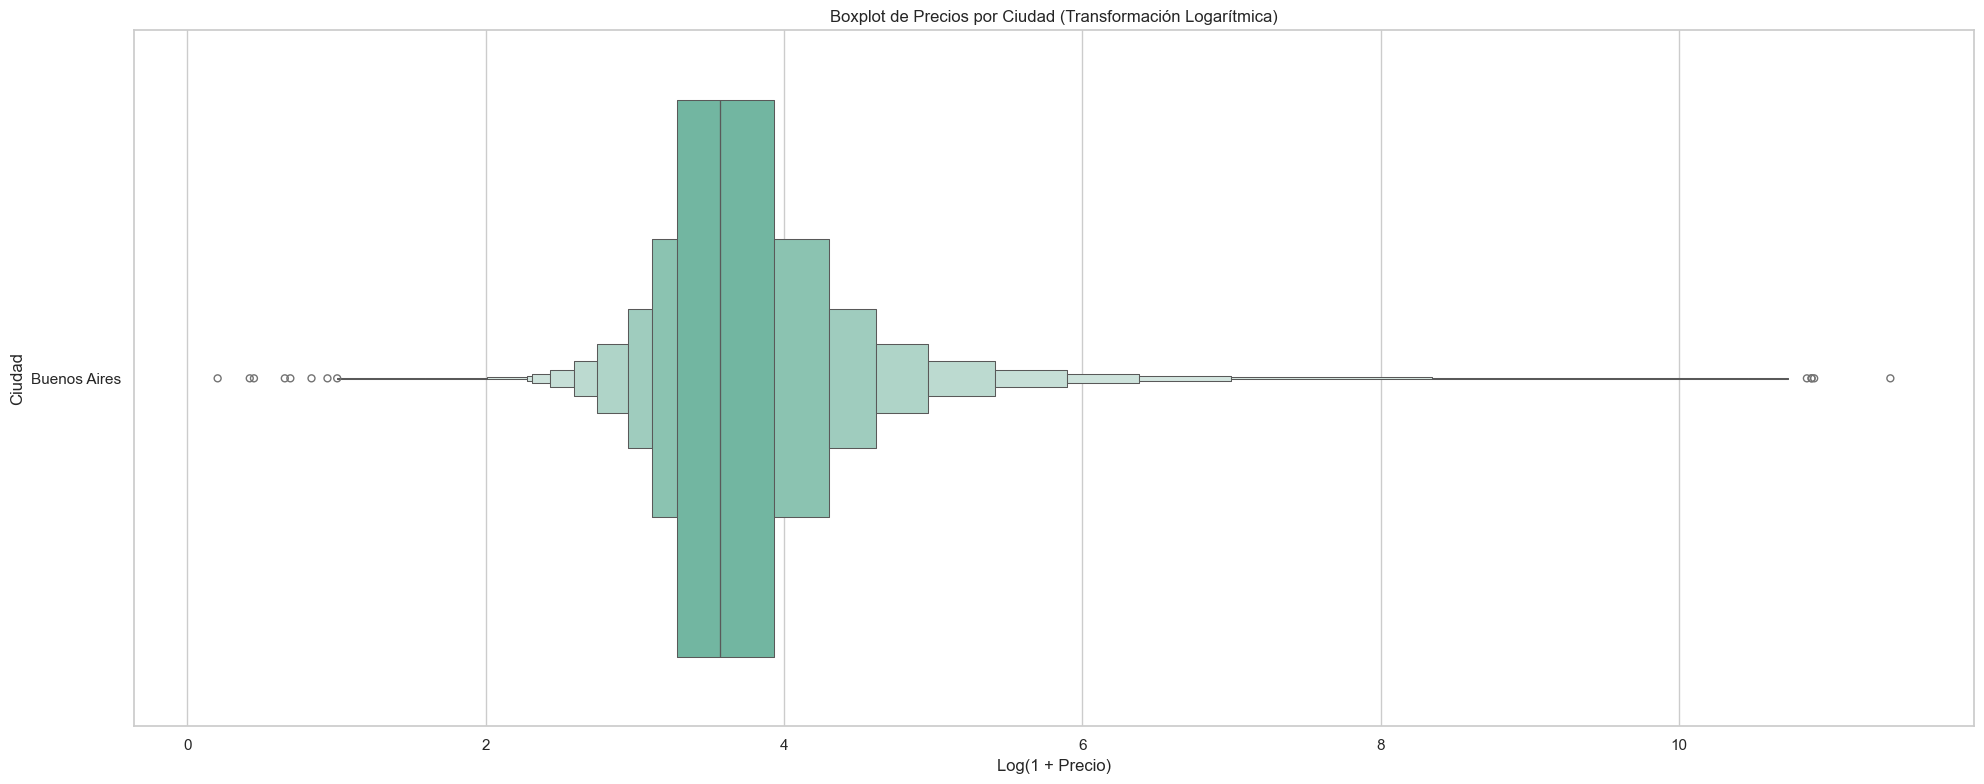

In [37]:
# Crear nueva columna de precio logarítmico
df["log_price"] = np.log1p(df["price"])

# Boxplot con escala logarítmica
plt.figure(figsize=(20, 8))
sns.boxenplot(data=df, y="city", x="log_price", palette="Set2")
plt.title("Boxplot de Precios por Ciudad (Transformación Logarítmica)")
plt.xlabel("Log(1 + Precio)")
plt.ylabel("Ciudad")
plt.tight_layout()
plt.show()

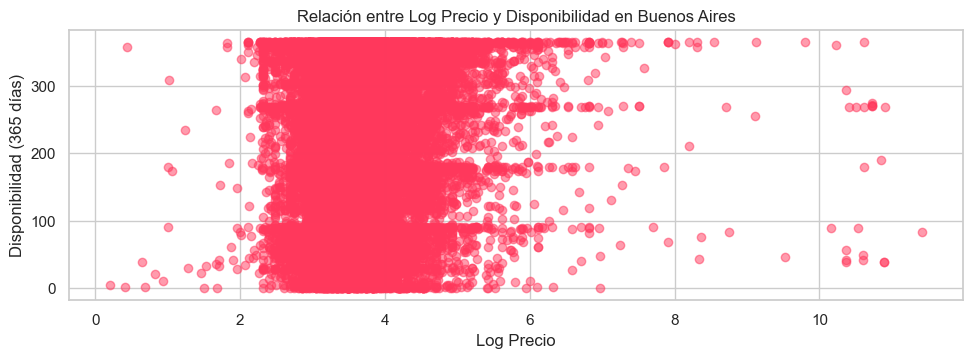

In [38]:
# Obtener lista de ciudades únicas
cities = df["city"].dropna().unique()

# Crear subplots
plt.figure(figsize=(19, 10))

for i, city in enumerate(sorted(cities), start=1):
    plt.subplot(3, 2, i)  # ajustá si hay más/menos ciudades
    city_df = df[df["city"] == city]
    plt.scatter(city_df["log_price"], city_df["availability_365"], color="#FF385C", alpha=0.5)
    plt.title(f'Relación entre Log Precio y Disponibilidad en {city}')
    plt.xlabel('Log Precio')
    plt.ylabel('Disponibilidad (365 días)')

plt.tight_layout()
plt.show()

In [39]:
# Calcular el coeficiente de correlación entre price y availability_365 por ciudad
for city in sorted(df["city"].dropna().unique()):
    city_df = df[df["city"] == city]
    corr_value = city_df["log_price"].corr(city_df["availability_365"])
    print(f'Coeficiente de correlación entre Log Precio y Disponibilidad en {city}: {corr_value:.4f}')

Coeficiente de correlación entre Log Precio y Disponibilidad en Buenos Aires: 0.0968


**interpretación:** Los coeficientes de correlación calculados son bajos, lo que indica una relación débil entre el precio y la disponibilidad en todas las ciudades analizadas. Ninguna de las ciudades muestra una fuerte correlación positiva o negativa entre estas dos variables.

Para visualizar los outliers en las variables `bathrooms`, `bedrooms`, `beds` y `accommodates`, utilizamos violinplots. Estos gráficos nos permiten identificar visualmente los valores atípicos que se encuentran fuera del rango esperado.

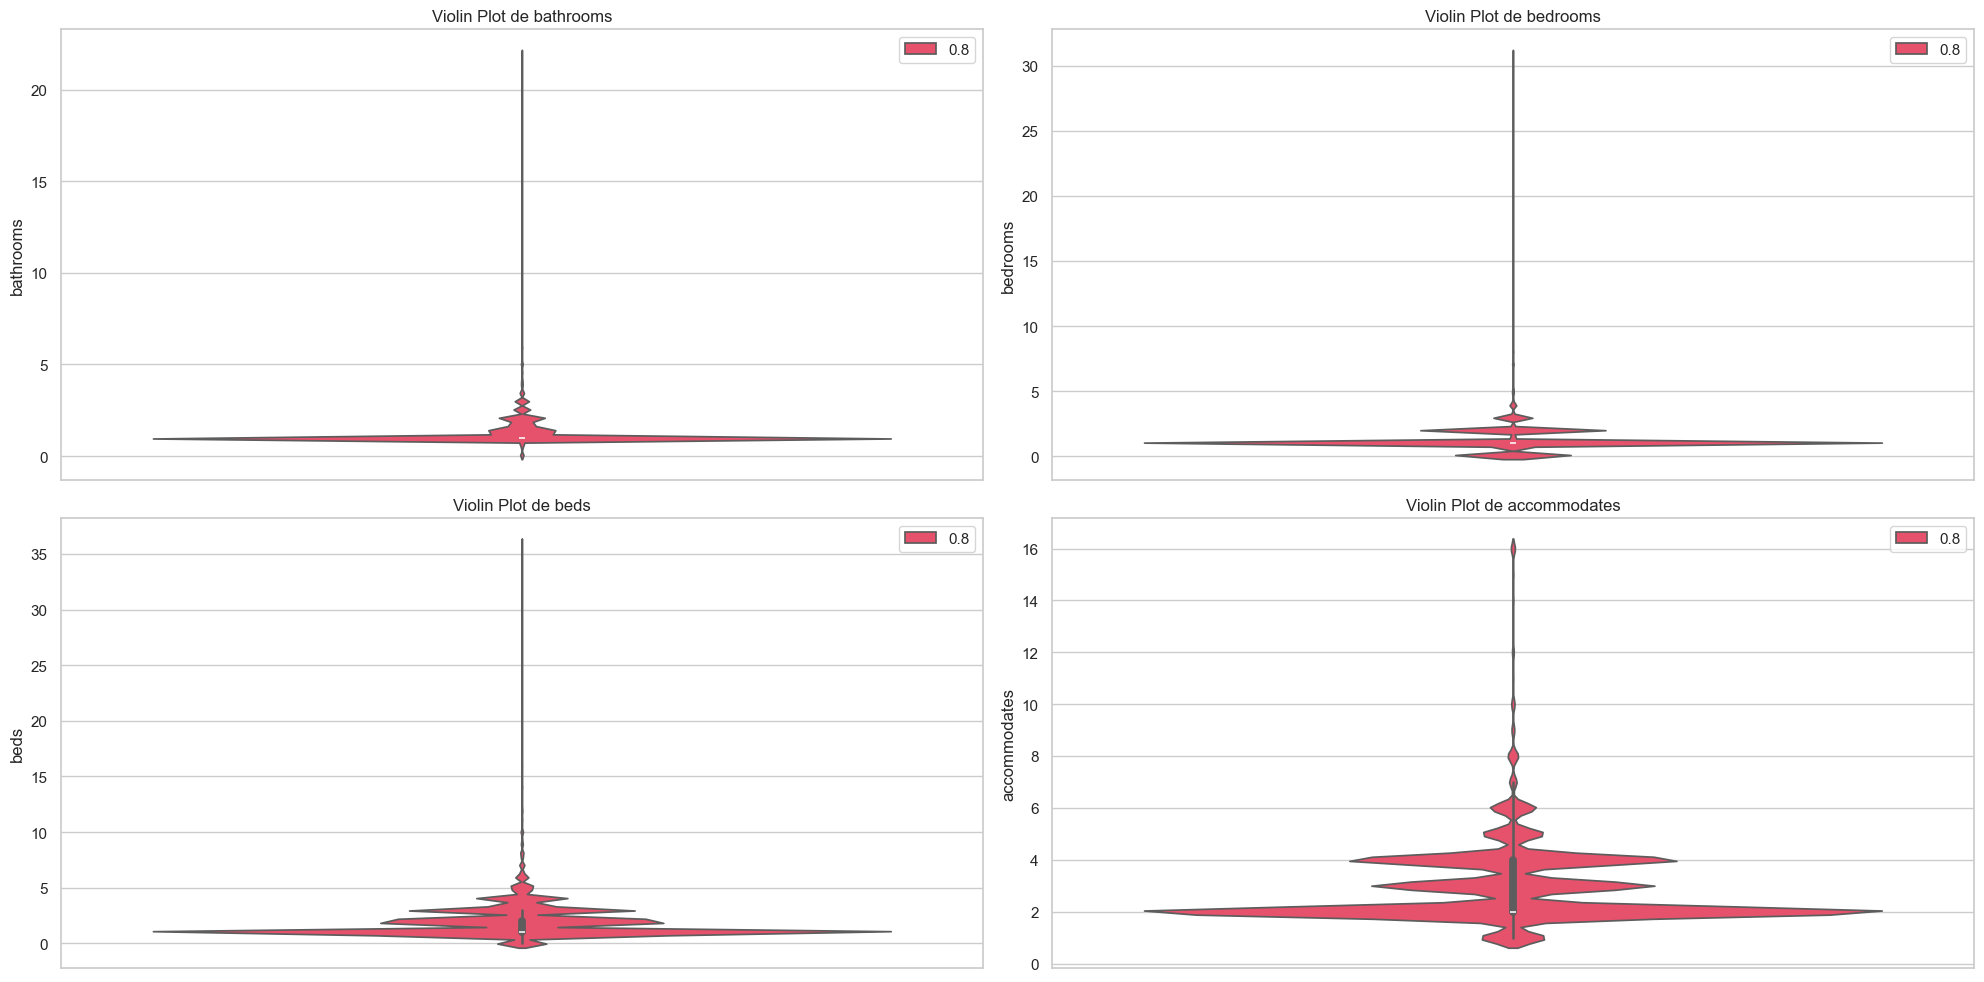

In [40]:
# Variables a analizar
variables = ['bathrooms', 'bedrooms', 'beds', 'accommodates']

plt.figure(figsize=(20, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.violinplot(y=df[var], palette=[color], hue=0.8)
    plt.title(f'Violin Plot de {var}')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

Las visualizaciones sugieren que las variables `bathrooms`, `bedrooms`, `beds` y `accommodates` contienen varios outliers que podrían distorsionar los análisis y modelos predictivos.

Se definio un umbral de maximo 10 para cada una de las variables, eliminando los registros que excedan este umbral.

In [41]:
# Definir el umbral máximo
max_umbral = 10

# Filtrar outliers
df = df[
    (df["bathrooms"] <= max_umbral) &
    (df["bedrooms"] <= max_umbral) &
    (df["beds"] <= max_umbral) &
    (df["accommodates"] <= max_umbral)
]

# Mostrar estadísticas descriptivas de las columnas filtradas
print(df[["bathrooms", "bedrooms", "beds", "accommodates"]].describe())

          bathrooms      bedrooms          beds  accommodates
count  31390.000000  31390.000000  31390.000000  31390.000000
mean       1.213762      1.140236      1.839216      2.895540
std        0.543195      0.760972      1.225161      1.297265
min        0.000000      0.000000      0.000000      1.000000
25%        1.000000      1.000000      1.000000      2.000000
50%        1.000000      1.000000      1.000000      2.000000
75%        1.000000      1.000000      2.000000      4.000000
max        9.000000     10.000000     10.000000     10.000000


Se analizaran además la presencia de outliers en `minimum_nights` y `maximum_nights` realizando boxplots.

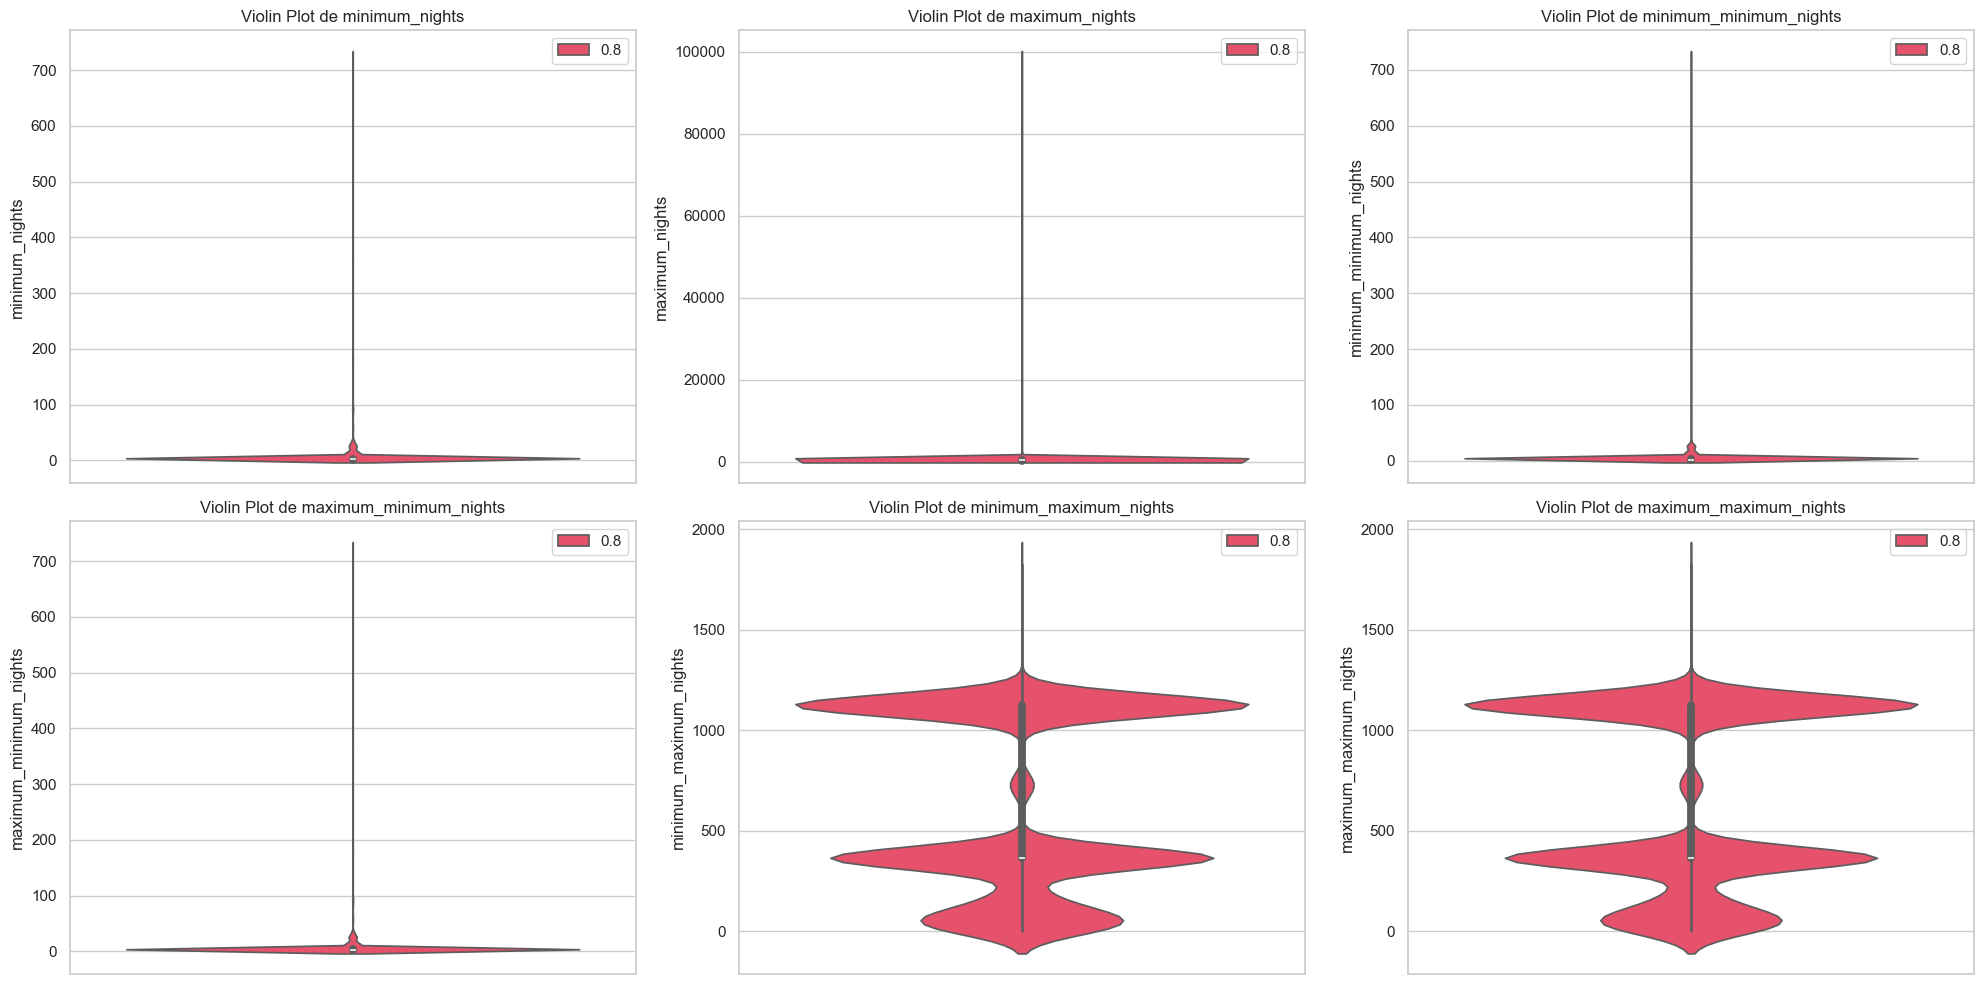

In [42]:
# Variables a analizar
variables = ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights']

plt.figure(figsize=(20, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.violinplot(y=df[var], palette=[color], hue=0.8)
    plt.title(f'Violin Plot de {var}')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

La visualización indica la presencia de valores extremos que distorsionan la interpretación de los datos. Se transformaran las variables tomando el logaritmo.

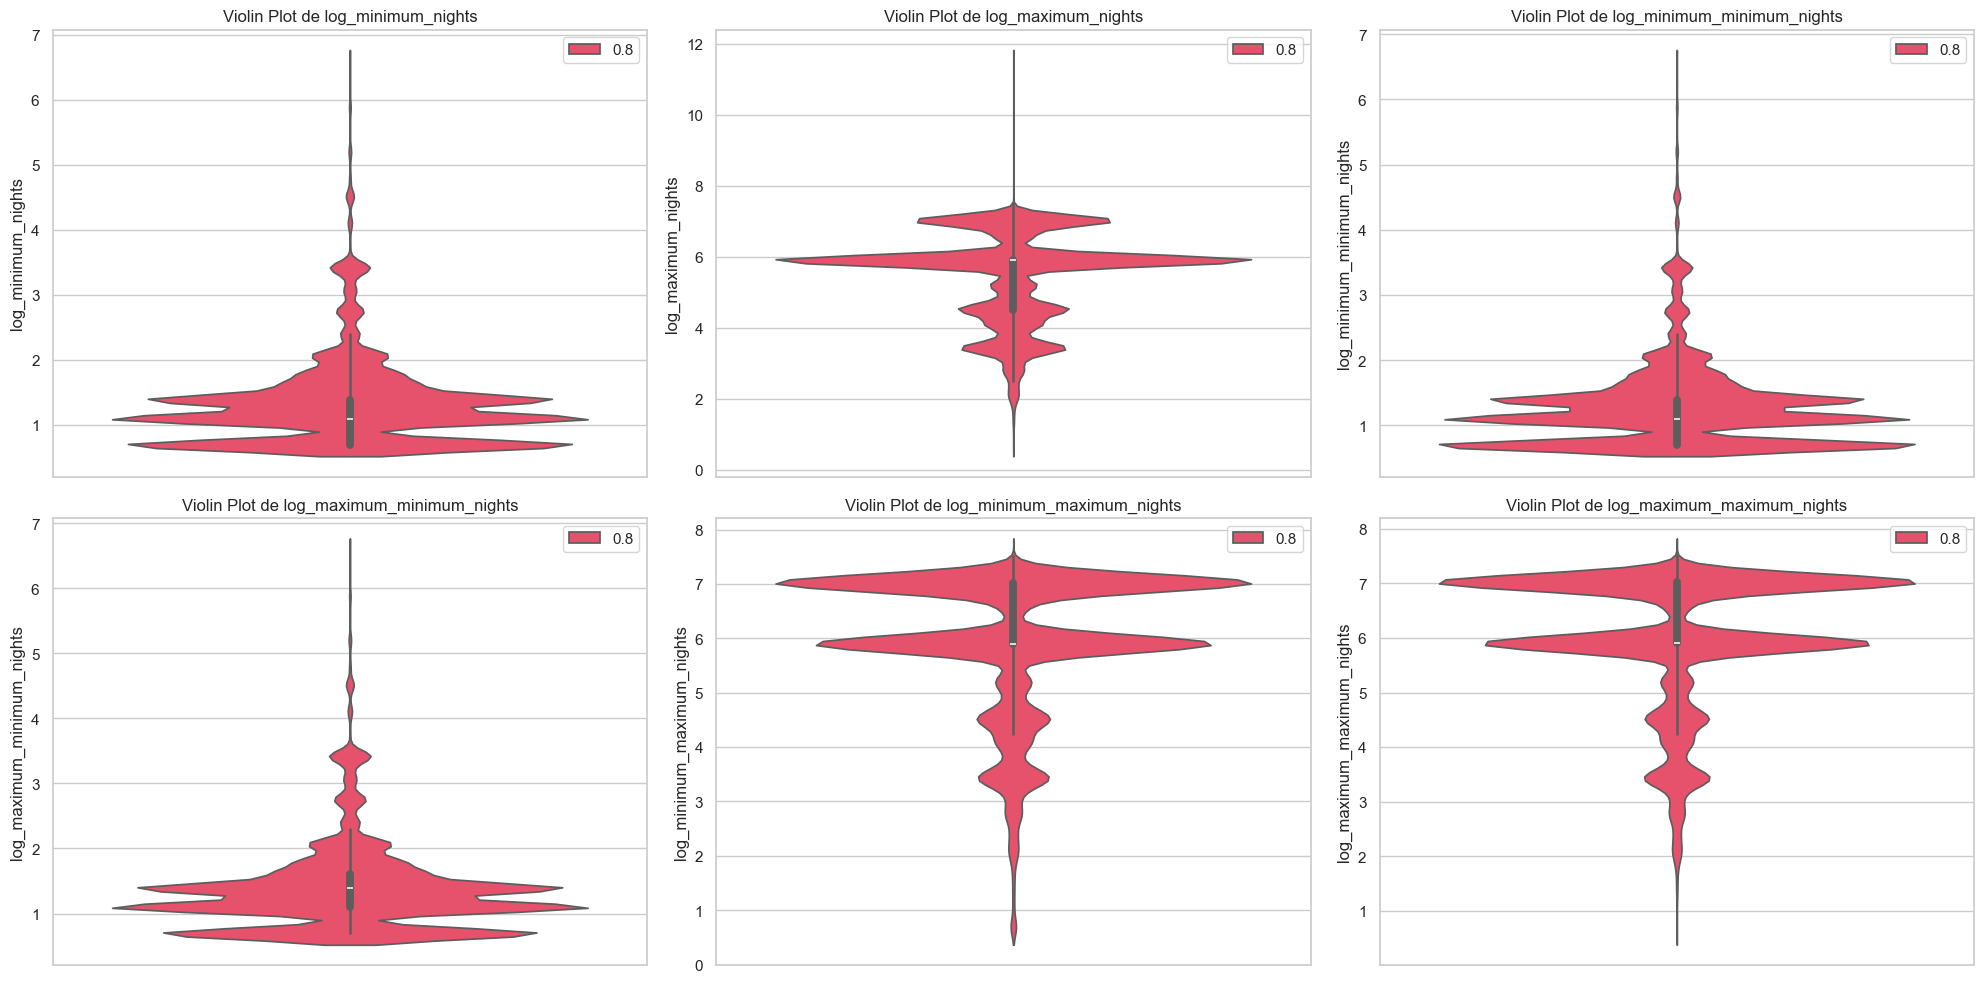

In [43]:
df = df.copy()
for col in variables:
    df.loc[:, "log_" + col] = np.log1p(df[col])

variables = ['log_minimum_nights', 'log_maximum_nights', 'log_minimum_minimum_nights', 'log_maximum_minimum_nights', 'log_minimum_maximum_nights', 'log_maximum_maximum_nights']

plt.figure(figsize=(20, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.violinplot(y=df[var], palette=[color], hue=0.8)
    plt.title(f'Violin Plot de {var}')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

#### 3. Correlación con Ocupación
Exploramos la relación entre las variables númericas con la variable target para identificar patrones o tendencias que puedan informar decisiones de negocio fundamentadas.


In [44]:
# Eliminar columnas no deseadas y asegurar que existan en df
columns_to_remove = ['longitude', 'latitude', 'scrape_id', 'availability_60', 'availability_90', 'availability_365', 'availability_30', 'availability_eoy', 'estimated_occupancy_l365d', 'id', 'host_id']
numerical_columns = [col for col in numeric_cols if col not in columns_to_remove and col in df.columns]

# Definir target
target_column = 'occupation_rate'

# Calcular correlaciones con el target
correlations = {
    col: df[[col, target_column]].corr().iloc[0, 1]
    for col in numerical_columns
    if col != target_column
}

# Ordenar por magnitud
correlations_sorted = dict(sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True))

/var/folders/w_/wxbpcvrx4j32nhvgtndjj5r1jblnfs/T/ipykernel_95836/1077642816.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x='Correlation', y='Feature', palette='viridis')


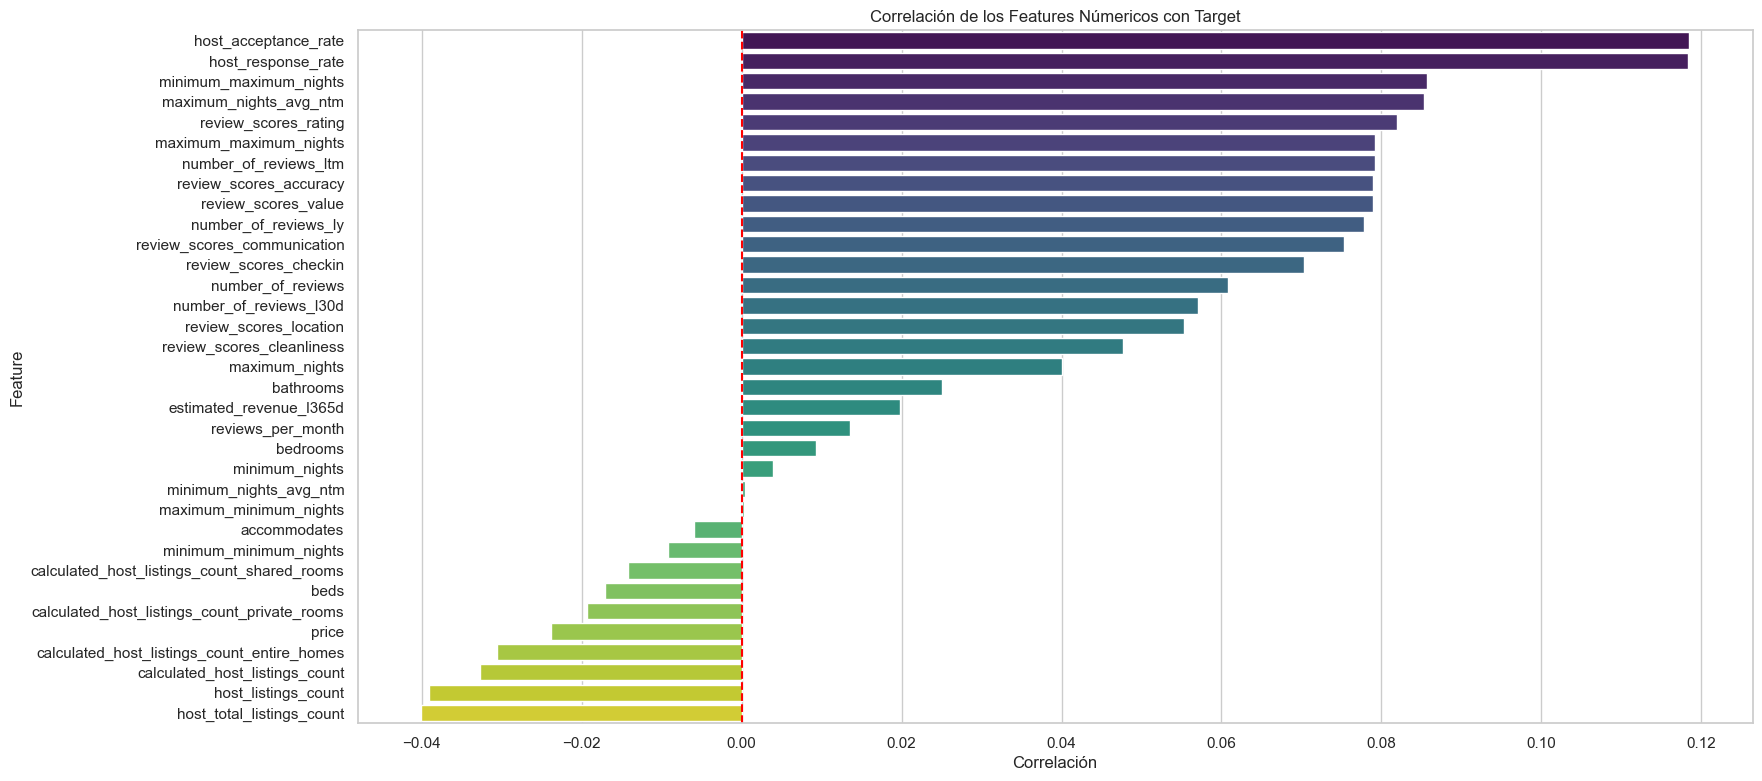

In [45]:
# Convertir las correlaciones a un DataFrame de pandas
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

# Ordenar el DataFrame por la correlación
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Visualizar las correlaciones usando seaborn
plt.figure(figsize=(18, 9))
sns.barplot(data=correlation_df, x='Correlation', y='Feature', palette='viridis')
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Correlación de los Features Númericos con Target')
plt.xlabel('Correlación')
plt.ylabel('Feature')
plt.show()

**interpretacion:**

#### 4. Matriz de Correlación
Para entender las relaciones entre las variables numéricas, se calculó y visualizó una matriz de correlación.

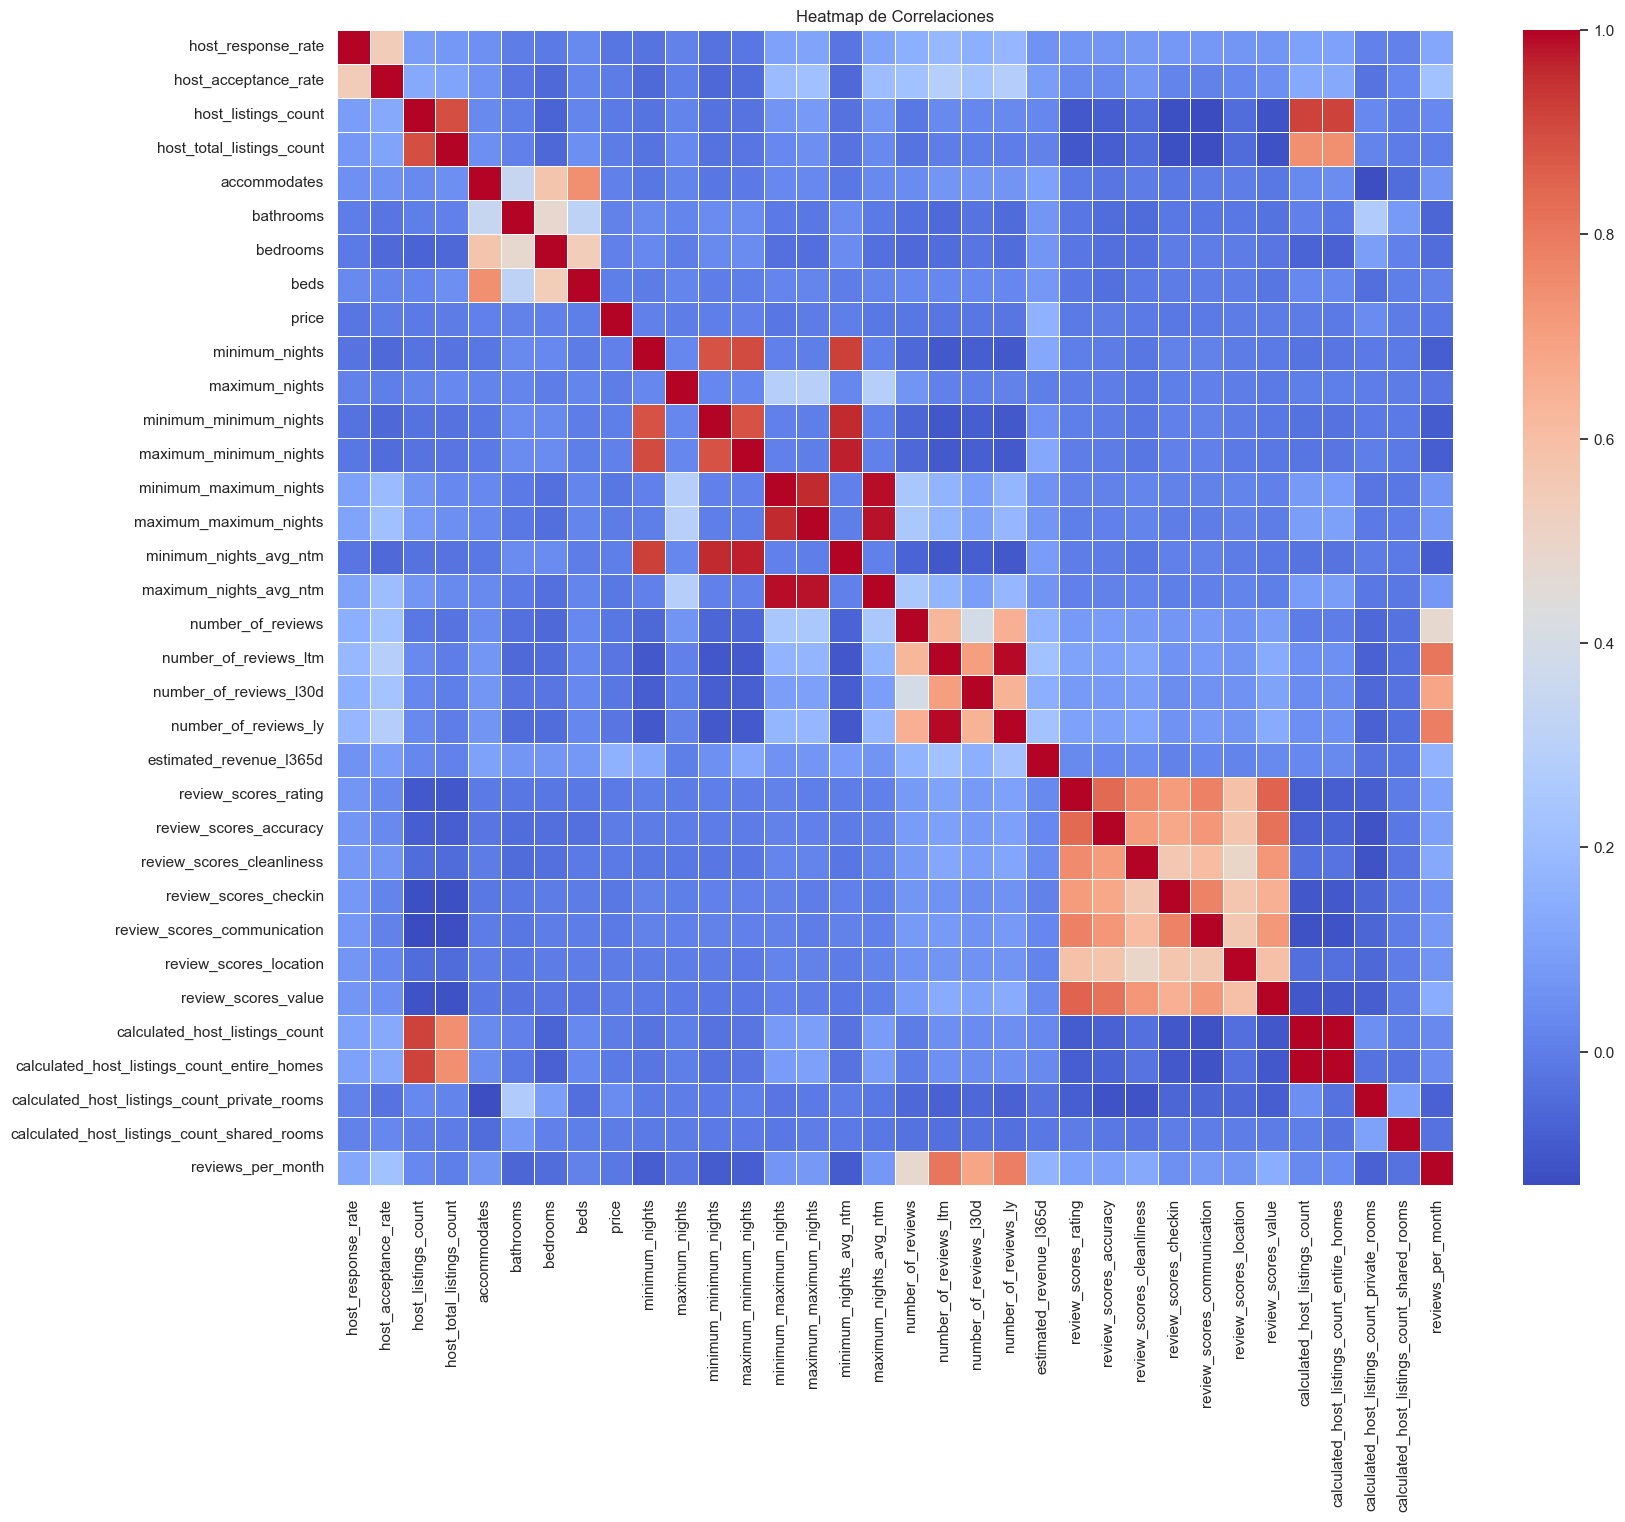

In [46]:
# Calcular la matriz de correlaciones
corr_matrix = df[numerical_columns].corr()

# Crear el heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# Mostrar el heatmap
plt.title('Heatmap de Correlaciones')
plt.show()

**Interpretación:**

#### 5. Distribuciones
Para analizar las distribuciones de las variables en nuestro dataset, se han creado gráficos de distribución utilizando histogramas y gráficos KDE (Kernel Density Estimation). Esto nos permite entender mejor cómo se distribuyen los datos para cada variable y detectar posibles sesgos o patrones.


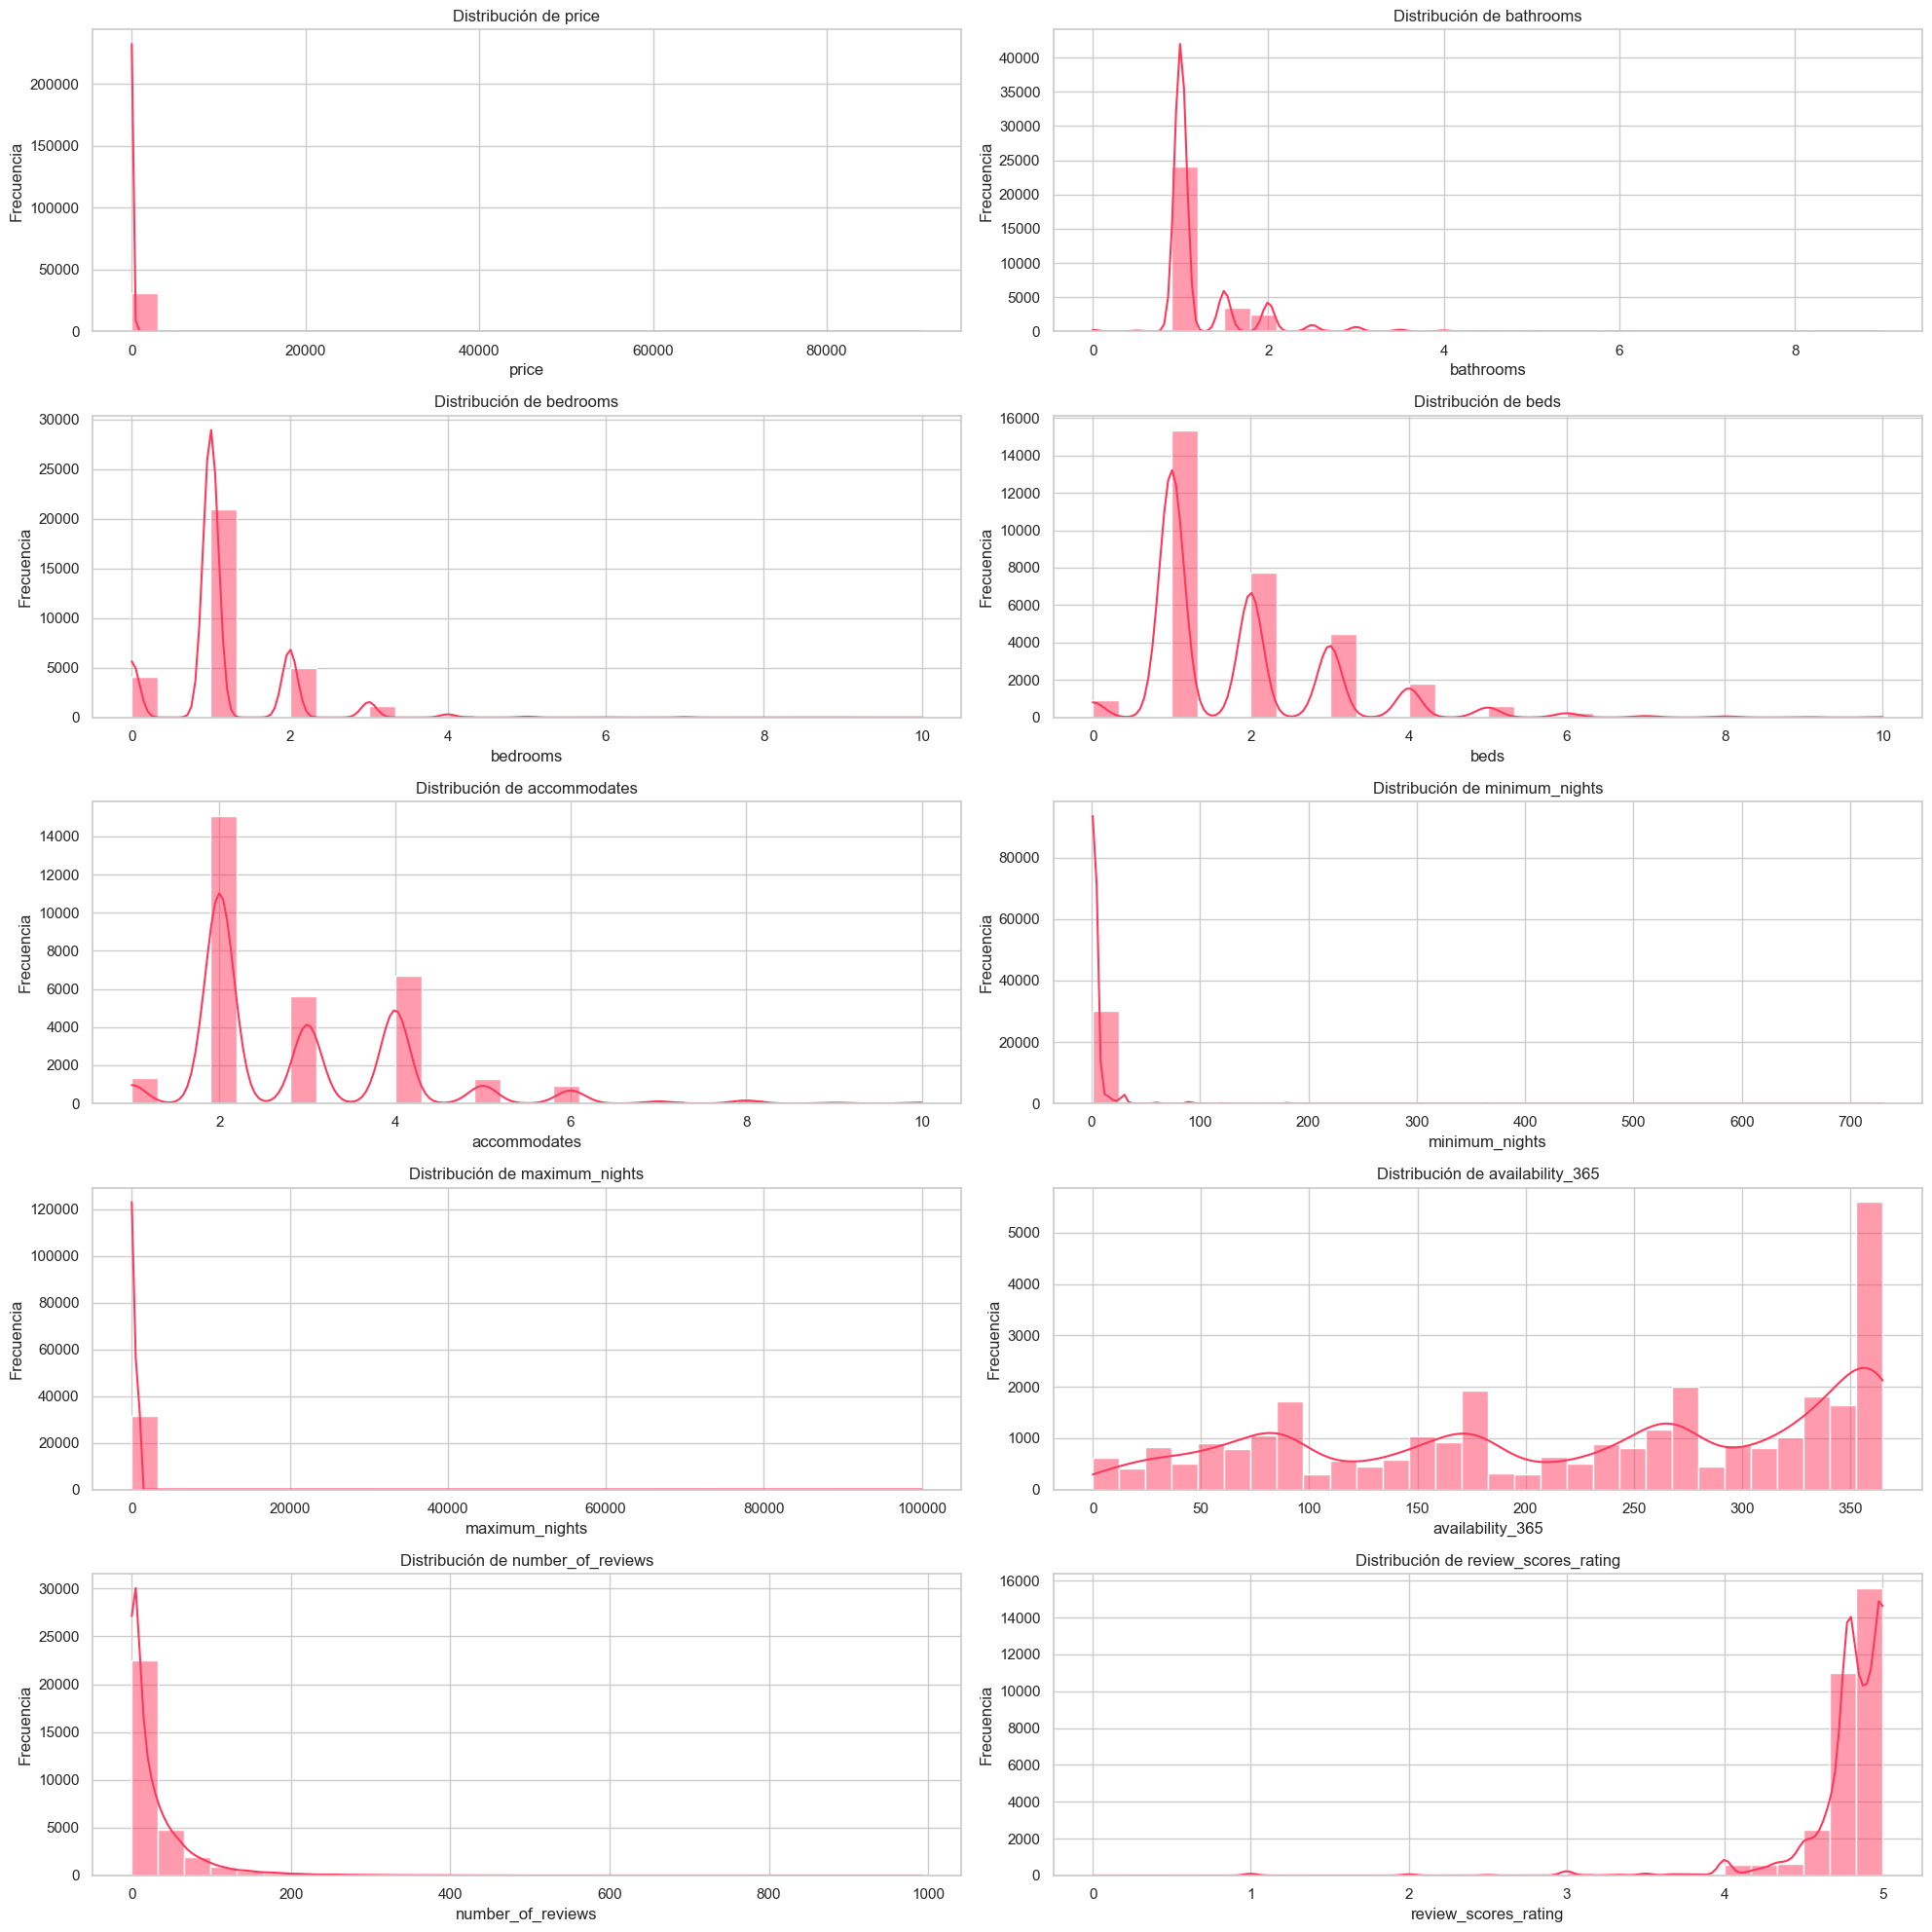

In [47]:
# Variables a analizar
variables = ['price', 'bathrooms', 'bedrooms', 'beds', 'accommodates', 
             'minimum_nights', 'maximum_nights', 'availability_365', 
             'number_of_reviews', 'review_scores_rating']

plt.figure(figsize=(20, 20))

for i, var in enumerate(variables, start=1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=var, kde=True, color='#FF385C', bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Interpretación:**

#### 5. Test Estadisticos
Se realizan pruebas estadísticas para validar la independencia de variables categóricas y comprender mejor la estructura de los datos. El test de Chi-cuadrado se utiliza para determinar si existe una asociación significativa entre dos variables categóricas.


In [48]:
# Variables categóricas a analizar
categoric_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
                  'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 
                  'has_availability', 'instant_bookable', 'city']

# Filtrar columnas categóricas
df_categorical = df[categoric_cols].copy()

In [49]:
# Guardar resultados
results = []

# Loop sobre combinaciones de pares de variables
for i in range(len(categoric_cols)):
    for j in range(i + 1, len(categoric_cols)):
        var1 = categoric_cols[i]
        var2 = categoric_cols[j]

        # Crear tabla de contingencia
        contingency_table = pd.crosstab(df_categorical[var1], df_categorical[var2])

        # Aplicar test de chi-cuadrado
        chi2, p, dof, _ = chi2_contingency(contingency_table)

        # Guardar resultados
        results.append({
            "variable_1": var1,
            "variable_2": var2,
            "chi2_statistic": chi2,
            "p_value": p,
            "degrees_of_freedom": dof
        })

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)

# Ordenar por p-value (opcional)
results_df = results_df.sort_values(by="p_value").reset_index(drop=True)

# Mostrar los resultados en formato de tabla
results_df.head(10)

,variable_1,variable_2,chi2_statistic,p_value,degrees_of_freedom
0,property_type,room_type,88584.805397,0.000000e+00,186
1,neighbourhood_cleansed,property_type,12927.787878,0.000000e+00,2914
2,room_type,bathrooms_text,26691.777091,0.000000e+00,111
3,host_identity_verified,has_availability,2128.800145,0.000000e+00,1
4,property_type,bathrooms_text,58558.566188,0.000000e+00,2294
5,neighbourhood_cleansed,bathrooms_text,4914.010321,4.873104e-300,1739
6,neighbourhood_cleansed,room_type,1356.999635,1.036933e-197,141
7,property_type,instant_bookable,671.255868,4.278089e-103,62
8,neighbourhood_cleansed,instant_bookable,538.272715,1.254380e-84,47
9,host_is_superhost,property_type,557.033925,1.029903e-80,62


## Guardar Base Preprocesada

In [50]:
df.to_csv("./airbnb_cleaned.csv", index=False)

In [52]:
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,verif_work_email,occupation_rate,occupated,log_price,log_minimum_nights,log_maximum_nights,log_minimum_minimum_nights,log_maximum_minimum_nights,log_minimum_maximum_nights,log_maximum_maximum_nights
0,11508,https://www.airbnb.com/rooms/11508,20250129142212,2025-01-30,city scrape,Amazing Luxurious Apt-Palermo Soho,LUXURIOUS 1 BDRM APT- POOL/ GYM/ 24-HR SECURIT...,AREA: PALERMO SOHO Minutes walking distance fr...,https://a0.muscache.com/pictures/19357696/b1de...,42762,...,0,0.933333,1,4.085256,1.386294,7.026427,1.386294,1.386294,7.026427,7.026427
1,14222,https://www.airbnb.com/rooms/14222,20250129142212,2025-01-30,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,...,0,0.283333,0,3.014176,2.079442,3.713572,2.079442,2.079442,7.026427,7.026427
3,16695,https://www.airbnb.com/rooms/16695,20250129142212,2025-01-30,city scrape,DUPLEX LOFT 2 - SAN TELMO,,San Telmo is one of the best neighborhoods in ...,https://a0.muscache.com/pictures/619c33a9-0618...,64880,...,0,0.000000,0,3.838679,1.098612,7.026427,1.098612,1.098612,7.026427,7.026427
4,20062,https://www.airbnb.com/rooms/20062,20250129142212,2025-01-30,city scrape,PENTHOUSE /Terrace & pool /City views /2bedrooms,,,https://a0.muscache.com/pictures/165679/2eb448...,75891,...,0,0.783333,0,4.596605,1.098612,5.902633,1.098612,1.386294,7.026427,7.026427
6,65446,https://www.airbnb.com/rooms/65446,20250129142212,2025-01-30,city scrape,Premier Loft with Breathtaking Views,Amazing Loft/duplex apartment on the 25th floo...,If you re an expat or vacationer spending time...,https://a0.muscache.com/pictures/66295365/af6f...,319901,...,0,0.916667,1,4.701511,1.386294,5.198497,1.386294,1.609438,4.615121,7.026427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35167,1342115041001869641,https://www.airbnb.com/rooms/1342115041001869641,20250129142212,2025-01-30,city scrape,Hermoso mono en Villa Crespo,Monoambiente // 36m2 From this accommodation p...,,https://a0.muscache.com/pictures/hosting/Hosti...,70552522,...,0,0.000000,0,3.849761,1.386294,5.902633,1.386294,1.386294,5.902633,5.902633
35168,1342119442743183150,https://www.airbnb.com/rooms/1342119442743183150,20250129142212,2025-01-29,city scrape,Alquiler Depto. en Almagro,Dept. perfect for a family of three looking fo...,,https://a0.muscache.com/pictures/miso/Hosting-...,675149940,...,0,0.016667,0,3.066138,0.693147,5.902633,0.693147,0.693147,5.902633,5.902633
35169,1342168607065747690,https://www.airbnb.com/rooms/1342168607065747690,20250129142212,2025-01-30,city scrape,Cozy Studio en Palermo Hollywood-G23K,Welcome this beautiful Studio in Palermo Holly...,,https://a0.muscache.com/pictures/miso/Hosting-...,14450833,...,0,0.383333,0,3.454800,0.693147,5.902633,0.693147,0.693147,5.902633,5.902633
35170,1342212789100075491,https://www.airbnb.com/rooms/1342212789100075491,20250129142212,2025-01-30,city scrape,Studio para 4 en Palermo Hollywood-G63K,Welcome to our charming apartment located in t...,,https://a0.muscache.com/pictures/miso/Hosting-...,14450833,...,0,0.350000,0,3.503019,0.693147,5.902633,0.693147,0.693147,5.902633,5.902633
